# [CDAF] Atividade 2

## Nome e matrícula
Nome: Bernardo Dutra Lemos   
Matrícula: 2022043949

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre estatísticas agregadas. Para esta atividade, usaremos dados do Brasileirão 2023 do FBRef.

## Questão 1
- Acesse os dados em https://fbref.com/en/comps/24/2023/schedule/2023-Serie-A-Scores-and-Fixtures
- Crie uma média móvel de 5 jogos, para cada equipe, de cada uma das seguintes estatísticas: xG pró, xG contra, e diferença de xG.
- Escolha 4 times para visualizar a série temporal das estatísticas acima. Uma visualização para cada uma das estatísticas, onde a média geral do campeonato é apresentada com uma linha pontilhada em conjunto com a média móvel dos times escolhidos.
- Interprete os resultados. O que isso pode indicar sobre a qualidade ofensiva e defensiva dos times escolhidos?

In [74]:
import pandas as pd
import numpy as np

df = pd.read_csv('Brasileirao_2023.csv')
df

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1,Sat,2023-04-15,16:00,América (MG),1.1,0–3,3.1,Fluminense,"6,653",Estádio Raimundo Sampaio,Braulio da Silva Machado,Match Report,NaN
1,1,Sat,2023-04-15,16:00,Palmeiras,3,2–1,1,Cuiabá,"35,835",Allianz Parque,Paulo Cesar Zanovelli da Silva,Match Report,NaN
2,1,Sat,2023-04-15,18:30,Bragantino,2,2–1,0.7,Bahia,"3,368",Estádio Nabi Abi Chedid,Maguielson Lima Barbosa,Match Report,NaN
3,1,Sat,2023-04-15,18:30,Botafogo (RJ),0.9,2–1,2,São Paulo,"11,708",Estádio Nilton Santos,Ramon Abatti Abel,Match Report,NaN
4,1,Sat,2023-04-15,18:30,Ath Paranaense,0.8,2–0,1,Goiás,"15,329",Estádio Joaquim Américo Guimarães,Rafael Rodrigo Klein,Match Report,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,38,Wed,2023-12-06,21:30,Fluminense,2.4,2–3,2.4,Grêmio,"44,190",Estadio Jornalista Mário Filho,Raphael Claus,Match Report,NaN
434,38,Wed,2023-12-06,21:30,São Paulo,0.5,1–0,0.4,Flamengo,"36,618",Estádio do Morumbi,Caio Max Augusto Vieira,Match Report,NaN
435,38,Wed,2023-12-06,21:30,Cruzeiro,1.6,1–1,1.4,Palmeiras,"44,190",Estádio Governador Magalhães Pinto,Anderson Daronco,Match Report,NaN
436,38,Wed,2023-12-06,21:30,Internacional,1.2,3–1,0.4,Botafogo (RJ),"27,365",Estádio José Pinheiro Borba,Flavio de Souza,Match Report,NaN


In [121]:
df = df.drop(df[df['xG'] == 'xG'].index).reset_index(drop=True)
df = df[['Wk','Home','xG','Away','xG.1']]
df['xG'] = df['xG'].astype(float)
df['xG.1'] = df['xG.1'].astype(float)

In [130]:
#criar df com 38 rodadas
df_media_movel_pro = pd.DataFrame(columns=np.arange(1, 39), index=df['Home'].unique())
df_media_movel_contra = pd.DataFrame(columns=np.arange(1, 39), index=df['Home'].unique())

In [174]:
def media_movel_pro(time,windows):
    df_media = df[(df['Home'] == time) | (df['Away'] == time)]
    for index, row in df_media.iterrows():
        if row['Home'] != time:
            df_media.at[index,'xG'] = row['xG.1']

    df_media_movel = df_media['xG'].rolling(windows,1).mean()
    return df_media_movel.values

def media_movel_contrario(time,windows):
    df_media = df[(df['Home'] == time) | (df['Away'] == time)]
    for index, row in df_media.iterrows():
        if row['Home'] != time:
            df_media.at[index,'xG.1'] = row['xG']

    df_media_movel = df_media['xG.1'].rolling(windows,1).mean()
    return df_media_movel.values


In [149]:
for team in df['Home'].unique():
    if team is not np.nan:
        df_media_movel_pro.loc[team] = media_movel_pro(team,5)
        df_media_movel_contra.loc[team] = media_movel_contrario(team,5)
df_diff = df_media_movel_pro - df_media_movel_contra

In [168]:
import matplotlib.pyplot as plt

def plot_media_movel(data, times):
    data = data.T
    plt.figure(figsize=(10, 6))

    # Adicionando a média móvel
    for time in times:
        plt.plot(data.index, data[time], label=time)

    media_geral = data.T.mean().values
    plt.plot(data.index,media_geral, color='black', linestyle='--', label='Média Geral')

    plt.xlabel('Índice')
    plt.ylabel('xG')
    plt.title('Visualização da Média Móvel por Grupo')
    plt.legend()
    plt.grid(True)
    plt.show()


In [169]:
times = ['Botafogo (RJ)', 'Atlético Mineiro', 'Santos', 'Palmeiras']

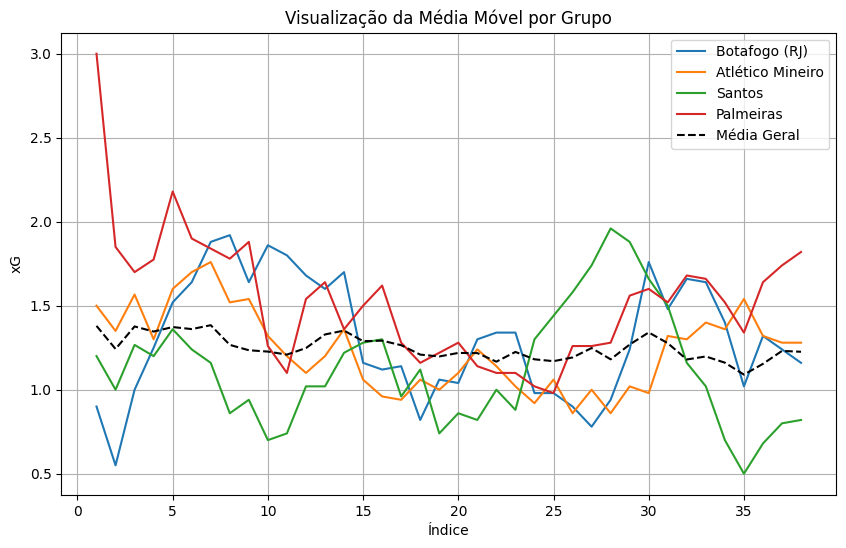

In [170]:
plot_media_movel(df_media_movel_pro, times)

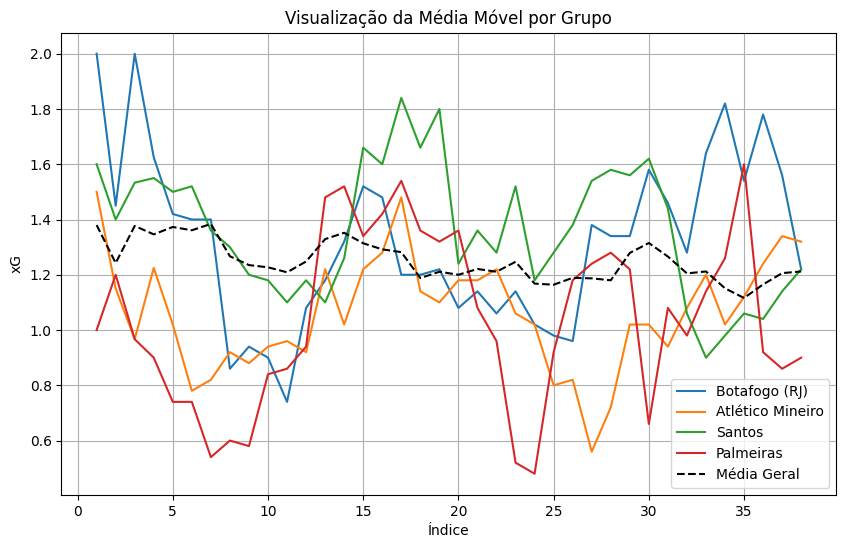

In [171]:
plot_media_movel(df_media_movel_contra, times)

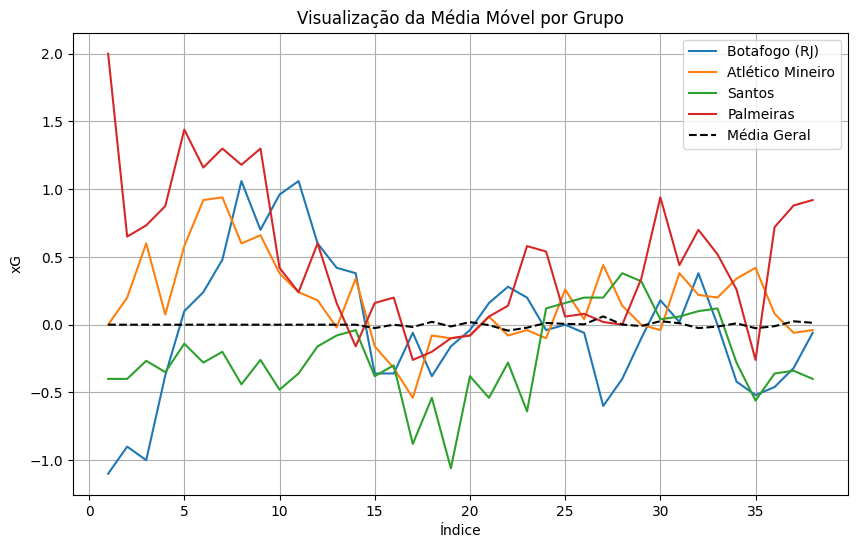

In [172]:
plot_media_movel(df_diff, times)

## Questão 2
- Agora repita a questão 1, plotando as séries temporais dos mesmos times, mas para uma janela móvel de 10 jogos.
- Quais as diferenças entre as séries temporais de 5 e 10 jogos? Em quais situações pode ser vantajoso escolher uma janela ao invés da outra?

In [175]:
for team in df['Home'].unique():
    if team is not np.nan:
        df_media_movel_pro.loc[team] = media_movel_pro(team,10)
        df_media_movel_contra.loc[team] = media_movel_contrario(team,10)
df_diff = df_media_movel_pro - df_media_movel_contra

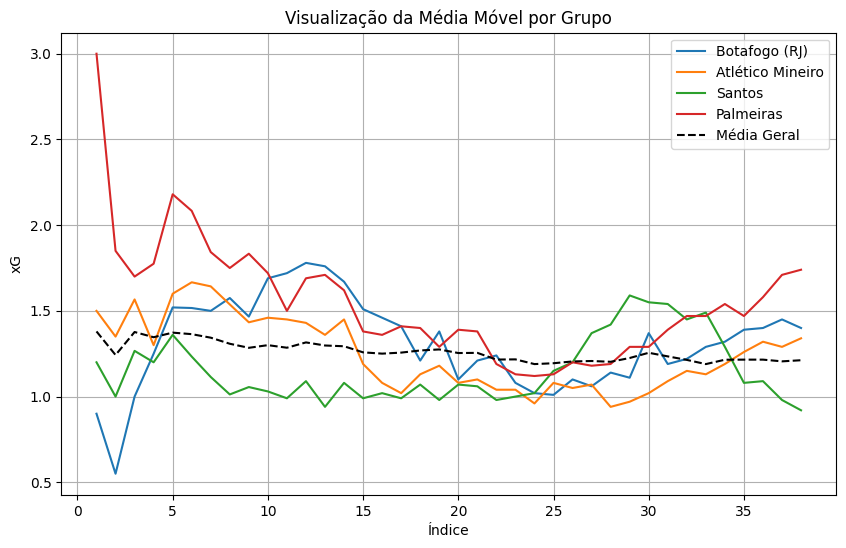

In [180]:
plot_media_movel(df_media_movel_pro, times)

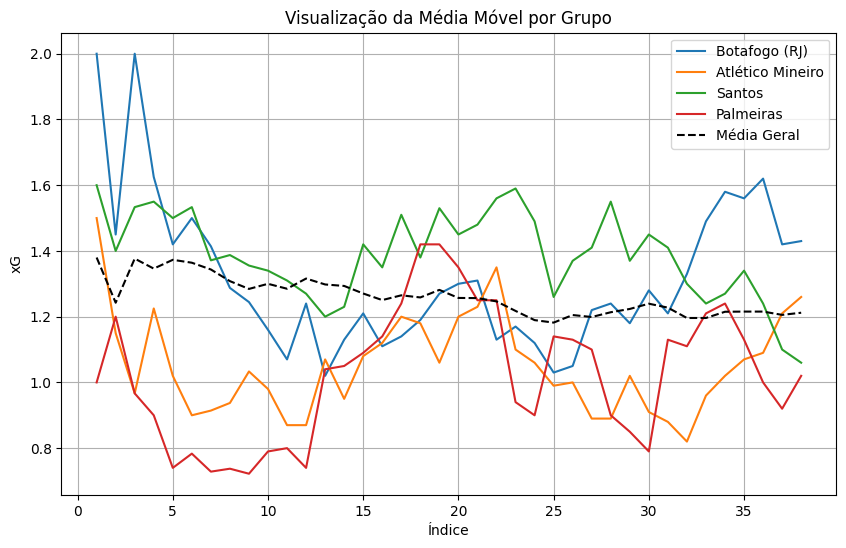

In [181]:
plot_media_movel(df_media_movel_contra, times)

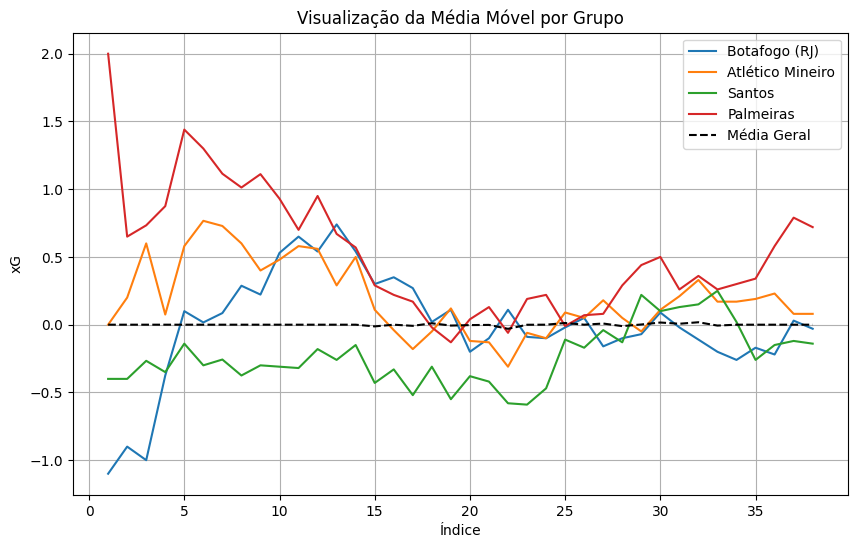

In [182]:
plot_media_movel(df_diff, times)

## Questão 3
- Vá para o link
-- https://fbref.com/en/comps/24/2023/stats/2023-Serie-A-Stats
- Nesta seção de estatísticas, é possível navegar por estatísticas específicas para diferentes aspectos do jogo (finalização, passe, defesa, etc.). Para todos exercícios a partir deste, você terá que selecionar aquelas que julgar mais relevantes para responder as questões.
- Monte um radar plot com 6 atributos relevantes para atacantes e compare 3 jogadores de sua escolha. Justifique a escolha de cada um dos atributos, a escolha da escala dos radares e o tipo de normalização. Interprete os resultados dos radares em termos das qualidades e limitações dos jogadores.
- Ref Soccermatics:
-- https://soccermatics.readthedocs.io/en/latest/lesson3/ScoutingPlayers.html
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson3/plot_RadarPlot.html

## Questão 4
- Faça o mesmo que na questão 3, mas para meio campistas.

## Questão 5
- Faça o mesmo que na questão 3, mas para zagueiros.

## Questão 6
- Discuta as diferenças entre os radares das questões 3, 4 e 5. Quais são as principais diferenças entre os atributos relevantes para cada posição? Quais são as principais semelhanças? A impressão subjetiva que você tinha dos jogadores se comprovou pelos radares? Se não, por quê? Quais posições são mais difíceis de serem avaliadas por estatísticas?